Ugesh Kc

The dataset is from the National Institute of Diabetes and Digestive and Kidney Diseases.
The aim of the dataset is to diagnostically predict whether a patient has diabetes looking certain diagnostic measurements included in the dataset.
Pregnancies: To express the Number of pregnancies
Glucose: To express the Glucose level in blood
BloodPressure: To express the Blood pressure measurement
SkinThickness: To express the thickness of the skin



In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ASSIGNMENT-1/diabetes (1).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.tail()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
#Data Overview
df.shape


(768, 9)

In [4]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.dtypes


,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
#Data Imputation
df.isna()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [8]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
763,False
764,False
765,False
766,False


In [9]:
#EDA graphs for all

import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Pregnancies', ylabel='Count'>

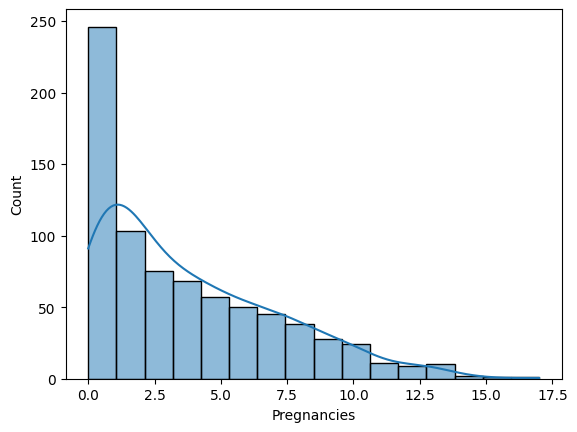

In [10]:
#Histogram for prgenancies
sns.histplot(df['Pregnancies'],kde=True)


<Axes: xlabel='Glucose', ylabel='Count'>

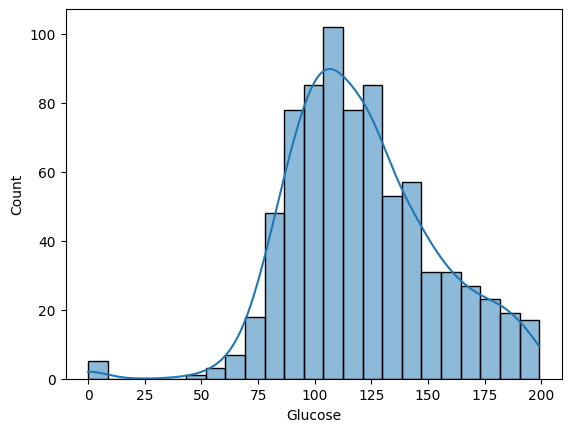

In [11]:
#histogram for glucose
sns.histplot(df['Glucose'],kde=True)

<Axes: xlabel='BloodPressure', ylabel='Count'>

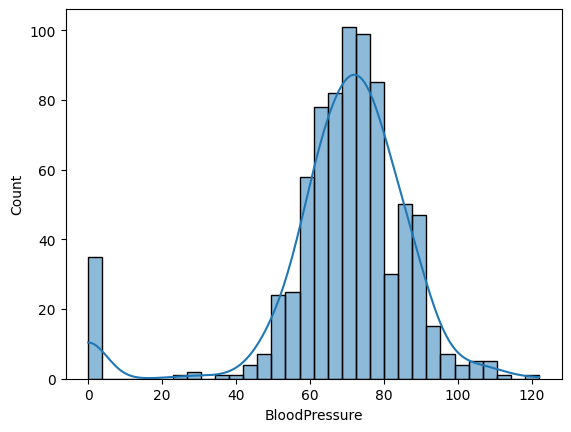

In [12]:
#histogram for Blood pressure
sns.histplot(df['BloodPressure'],kde=True)

<Axes: xlabel='SkinThickness', ylabel='Count'>

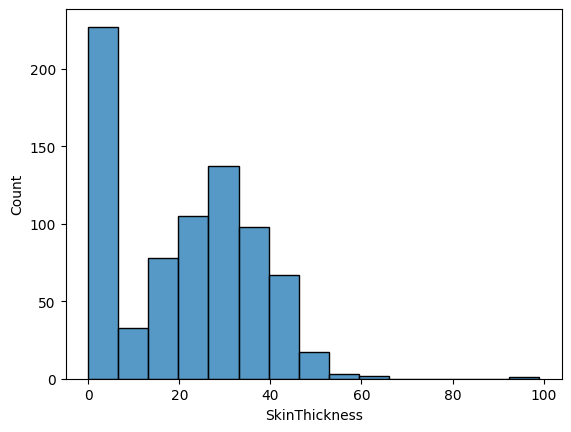

In [13]:
#histogram for skin thickness
sns.histplot(df['SkinThickness'])

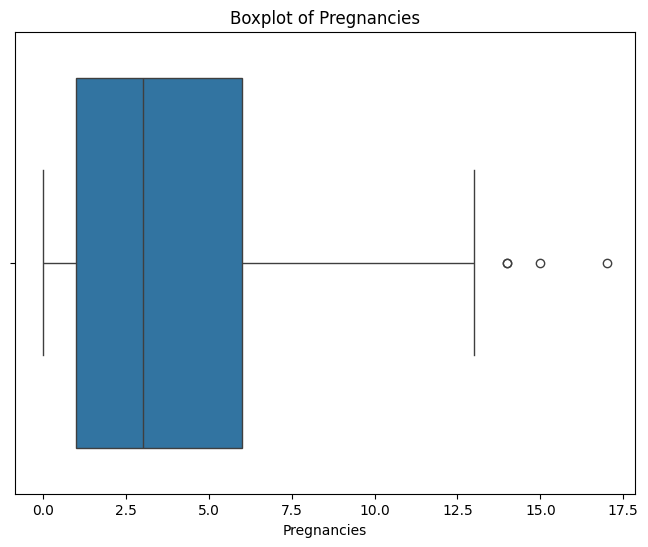

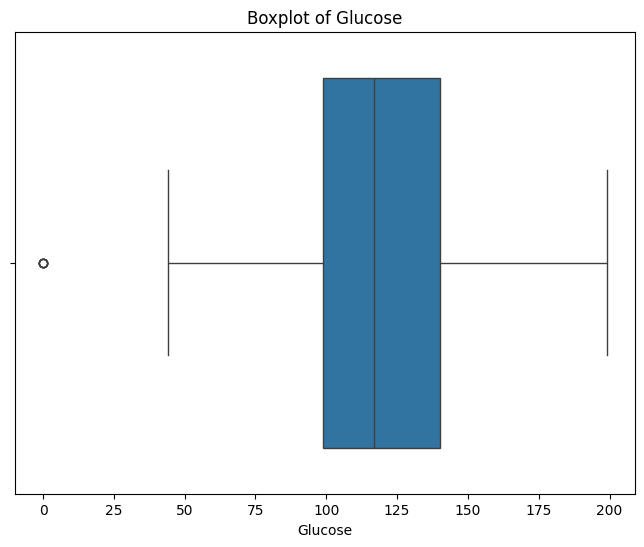

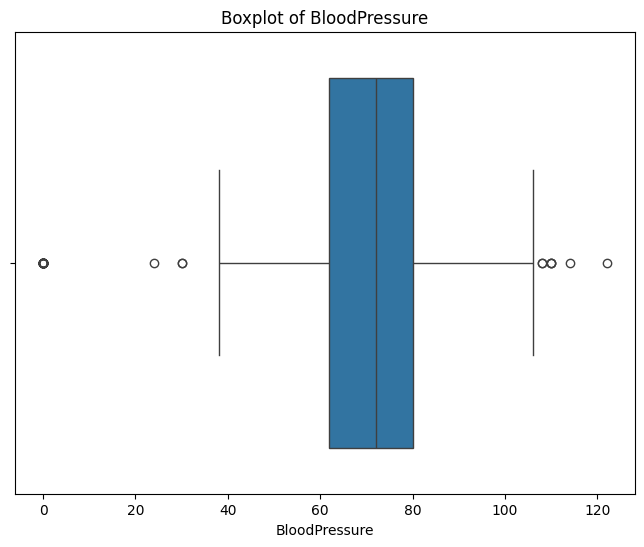

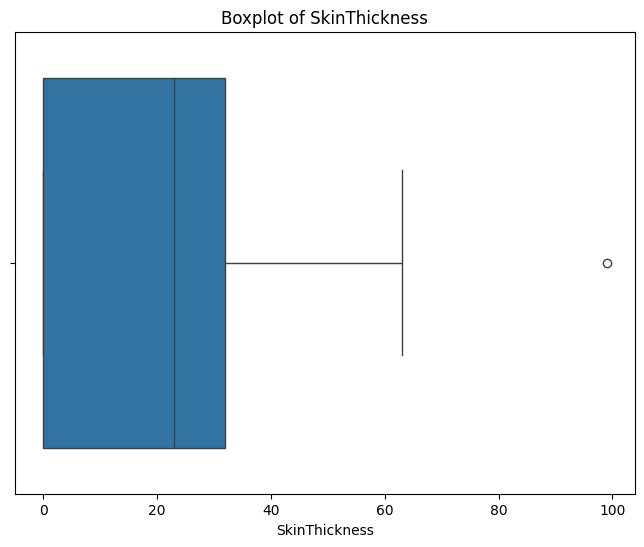

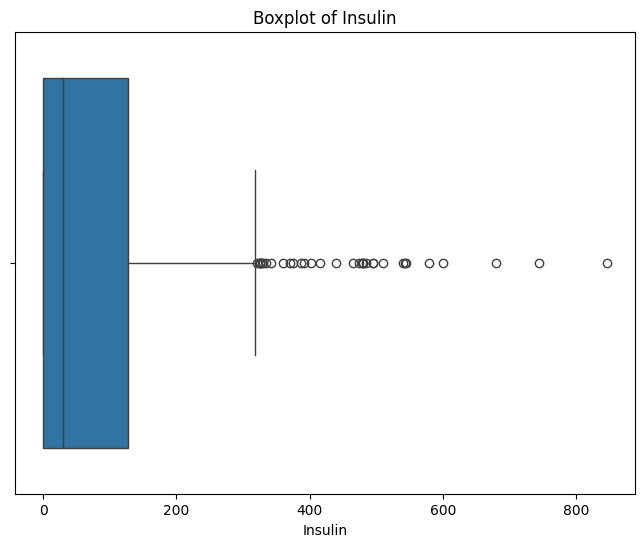

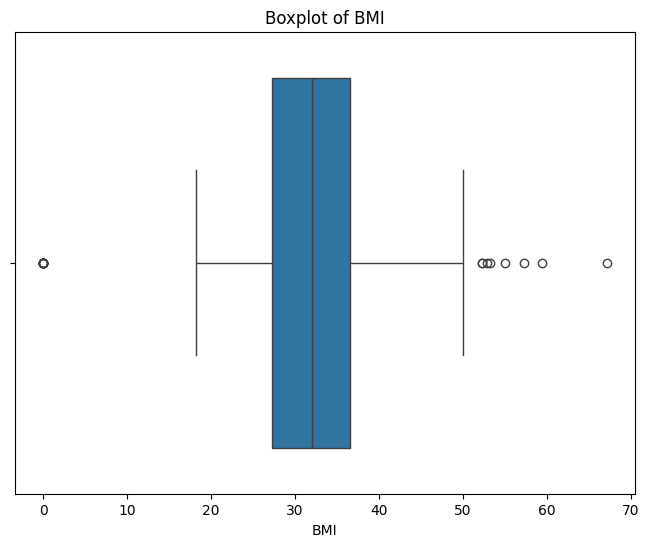

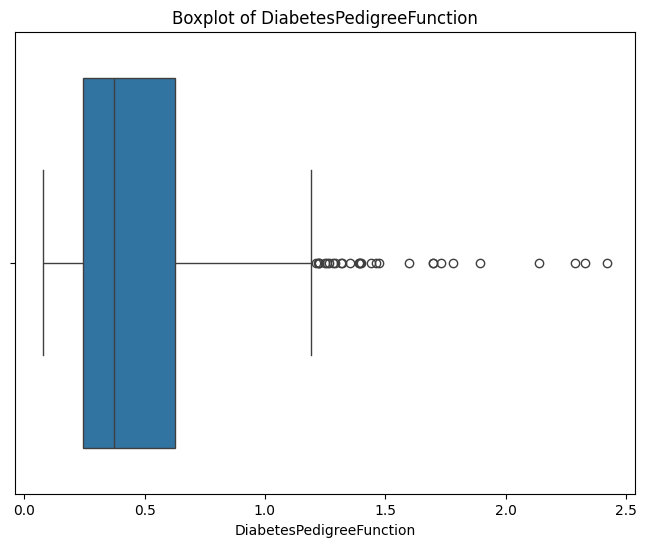

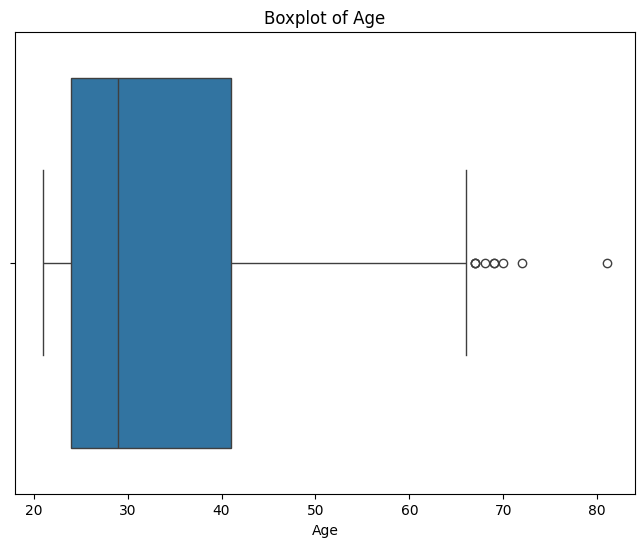

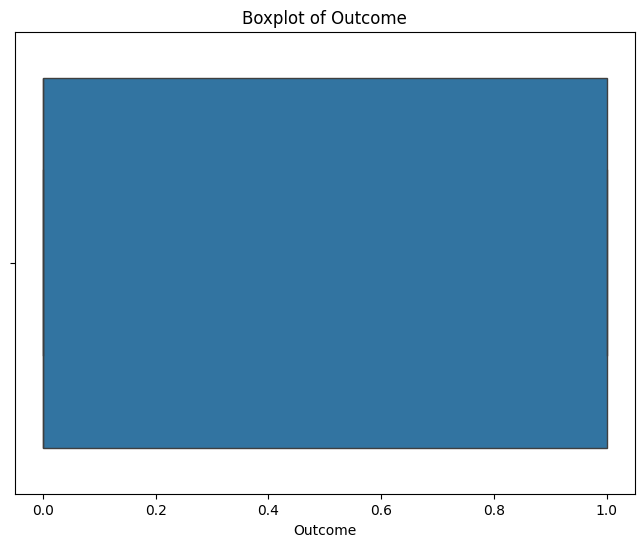

In [14]:

# Boxplots for numerical features
for column in df.select_dtypes(include=['number']):
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()



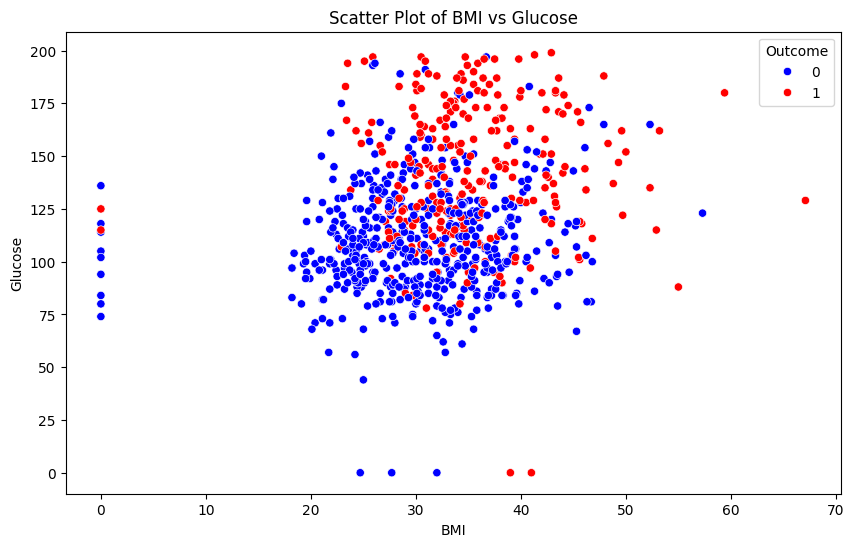

In [15]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Glucose', hue='Outcome', data=df, palette=['blue', 'red'])
plt.title('Scatter Plot of BMI vs Glucose')
plt.show()

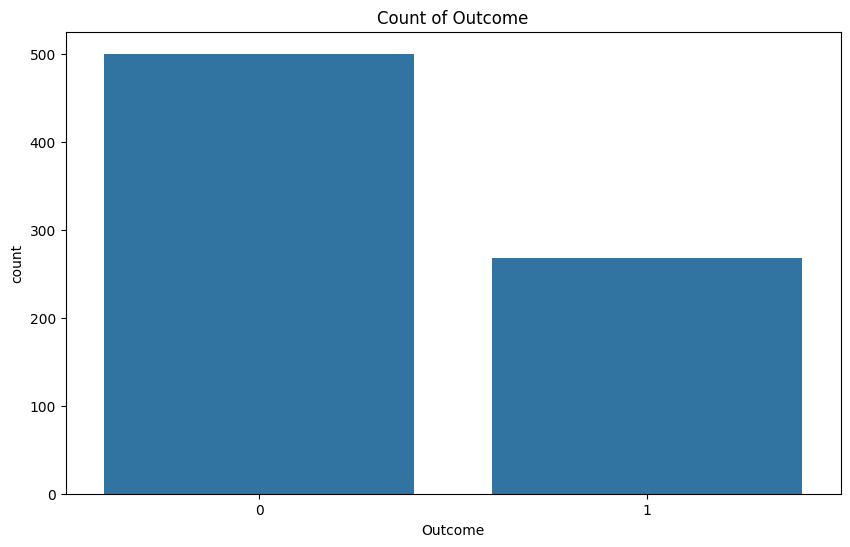

In [16]:
#barchart
plt.figure(figsize=(10, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Count of Outcome')
plt.show()

In [17]:
x = df.drop(columns=['BloodPressure'])
y = df['BloodPressure']


In [18]:
x.columns

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
#Data PreProcessing   watching data before training  changing categorical t0 numerical   for computer to understand the numerical
#ordinal do in numerical 01234
#onehotencoding    changing position of 1    1000000    01000000 00010000
#data normalization is data scaling for making all variable same weight 10% 10% 20% 30 % 90%
#standard and min max scaling
#min max  overall data in 0 1 ma check garni
#standard   mean = 0 and var = 1    for capturing everything
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
#Scaling all features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [21]:
#Train-test split(80% training,20% test)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [22]:
#Initializing and training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
#Making predictions
y_pred = model.predict(X_test)

In [24]:
#Evaluating the model   mse &r2    r2 captures variance(of a line in linear regression 0-1)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 402.8523890426408
R-squared: 0.19403775986668126


In [27]:
# logistic regression model
import pandas as pd
from sklearn.model_selection import train_test_split  # Import this to fix the error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score


# Load data
data = pd.read_csv('/content/drive/MyDrive/ASSIGNMENT-1/diabetes (1).csv')

# Split data
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, log_preds))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

Logistic Regression ROC-AUC: 0.8229629629629629


**Model Evaluation**


The Mean Square Error (MSE) of the Linear Regression on the prediction of blood pressure was 402.85, while the R-squred was 0.19. This means the predicted model accounts for only about 19% of the variance in blood pressure and is likely to be a poor fitting model missing some of the characteristics, noisy or non-linear elements inherent in the data set that the model cannot pick. The model used for the prediction of diabetes by Logistic Regression was not too bad, an accuracy of 71% and an ROC-AUC of 0.82 demonstrate good discriminatory ability. Nonetheless, the recall and the F1-score of the mi-nority class, namely the class of diabetes, were comparatively lower, and it is widely known that such outcomes may be a result of class imbalance. In All, therefore, while the Logistic Regression model is reasonably good for classification, considering class imbalance and feature selection may augment the model. In the case of Linear Regression the solution might be to modify some of the models and add more features."